## Gradio Pets

In [1]:
!pip install -Uqq fastai

In [2]:
from fastai.vision.all import *

def is_cat(x): return x[0].isupper() 

In [3]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

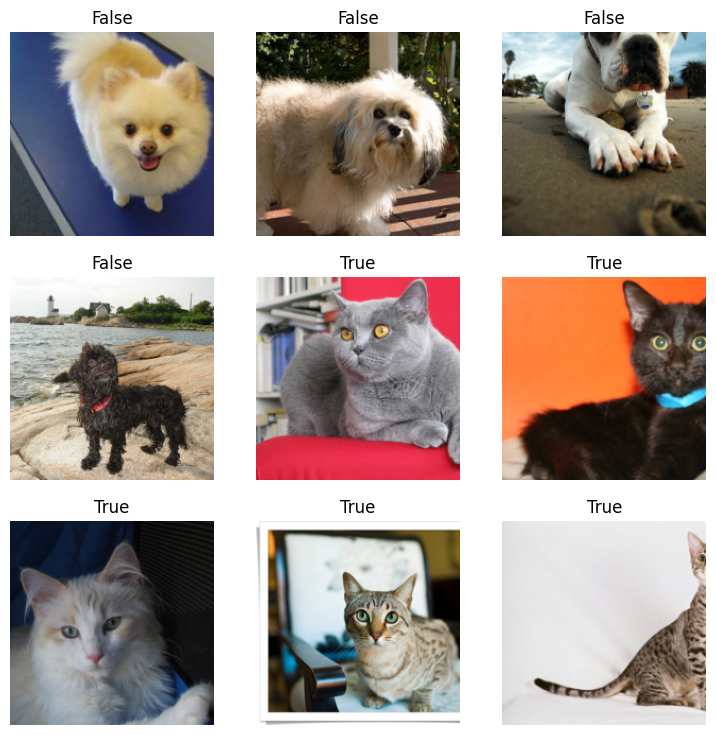

In [4]:
dls.show_batch()

In [18]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.203516,0.027207,0.008796,00:54


epoch,train_loss,valid_loss,error_rate,time
0,0.072658,0.031928,0.008796,00:56
1,0.045488,0.039490,0.011502,00:55
2,0.020562,0.020978,0.006766,00:55
3,0.012522,0.028330,0.004736,00:55


In [19]:
learn.export('model.pkl')

In [20]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import gradio as gr

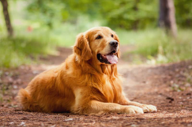

In [22]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [23]:
learner = load_learner('model.pkl')
learner.predict(im)

('False', tensor(0), tensor([1.0000e+00, 8.8808e-07]))

In [27]:
categories = ('Dog','Cat')

def classify_image(img):
   pred, idx, prob = learner.predict(img)
   return dict(zip(categories, map(float, prob)))

In [28]:
classify_image(im)

{'Dog': 0.9999991655349731, 'Cat': 8.880758173290815e-07}

In [29]:
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['dog.jpg','cat.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples = examples)
intf.launch(inline=False, share=True)

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://20783e9fd8a785a451.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
